<a href="https://colab.research.google.com/github/aubreymoore/crb-damage-detector-colab/blob/main/code/detect_and_annotate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# detect_and_annotate.ipynb
This Colab Jupyter notebook runs a custom YOLOv8 object detector which scans images to find three object classes: live coconut palms, dead coconut palms and v-shaped cuts symptomatic of damage caused by coconut rhinoceros beetle, *Oryctes rhinoceros*.


# Load trained model from GitHub repo
Will be saved as '/content/best.pt'

In [ ]:
!wget -nc https://github.com/aubreymoore/code-for-CRB-damage-ai/raw/refs/heads/main/models/3class/train5/weights/best.pt

File ‘best.pt’ already there; not retrieving.



# Load Python packages which are not preinstalled by Colab

In [ ]:
%pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.4/870.4 kB 23.9 MB/s eta 0:00:00


In [ ]:
%pip install supervision -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 4.6 MB/s eta 0:00:00


# Import modules

In [ ]:
import cv2
import supervision as sv
from ultralytics import YOLO
import imutils
# from skimage import io
# ultralytics.checks()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Define global constants

In [ ]:
# Path custom trained model; Example : '/content/drive/My Drive/path_to_your_model/your_model.pt'
MODELPATH = '/content/best.pt'
IMAGESOURCE = 'text' # 'text' or 'zip'; indicates if we use TEXTPATH or ZIPPATH to source images
TEXTPATH = ''        # a text file (*.txt) containing a list of URLs (one per line)
ZIPPATH = ''         # a ZIP file (*.zip) containing images to be scanned

# Define functions

In [ ]:
def get_detections(image):
# Make sure your Google Drive is mounted
# model = YOLO('/content/drive/My Drive/path_to_your_model/your_model.pt')

image = imutils.url_to_image('https://ultralytics.com/images/bus.jpg')
results = model(image)[0]


0: 640x480 4 persons, 1 bus, 1 stop sign, 266.6ms
Speed: 7.3ms preprocess, 266.6ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
detections = sv.Detections.from_ultralytics(results)

In [ ]:


annotated_image = box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

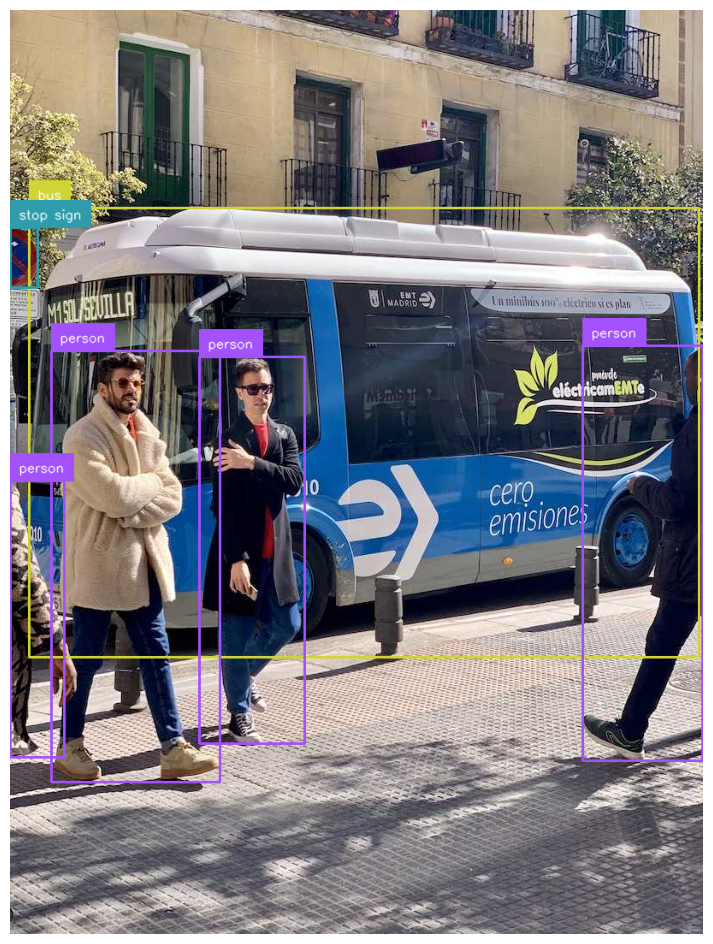

In [ ]:
sv.plot_image(annotated_image)

# Main program

In [ ]:
# import *.zip file containing images or *.txt file containing list of URLs
from google.colab import files
uploaded = files.upload()








# model = YOLO(MODELPATH) # load trained model
# box_annotator = sv.BoxAnnotator()
# label_annotator = sv.LabelAnnotator()





